# Pymaceuticals, Inc.

### Analysis
- There is a positive correlation between mouse weight and the average tumor size. This would indicate that the healthier the mouse's weight is, the smaller their tumors are likely to be.
- Capomulin is an effective treatment for tumors in mice, though the effects are slow.
- Capomulin and Ramicane are more effective at treating these tumors than Infubinol and Ceftamin, based on the study observed here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Import data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine into a single DataFrame
mouse_study_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display for preview
mouse_study_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice
mouse_count = len(mouse_study_combined["Mouse ID"].unique())
mouse_count

249

In [3]:
# Find any duplicate mice by ID that shows up for Mouse ID and Timepoint
mouse_study_combined["Mouse ID"].unique()
mouse_study_combined[mouse_study_combined[["Mouse ID", "Timepoint"]].duplicated() ==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Get all the data for the duplicate mouse ID
duplicate_mouse = mouse_study_combined.loc[mouse_study_combined["Mouse ID"] =="g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Drop the duplicate mouse data to make a new DataFrame
mouse_study_fixed = mouse_study_combined.drop(mouse_study_combined[mouse_study_combined["Mouse ID"] == "g989"].index)
mouse_study_fixed.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the new DataFrame
mouse_count_new = len(mouse_study_fixed["Mouse ID"].unique())
mouse_count_new

248

## Summary Statistics

In [7]:
# Create a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
regimen_group = mouse_study_fixed.groupby("Drug Regimen")

avg_tumor_by_regimen = regimen_group.mean()["Tumor Volume (mm3)"]
median_tumor_by_regimen = regimen_group.median()["Tumor Volume (mm3)"]
var_tumor_by_regimen = regimen_group.var()["Tumor Volume (mm3)"]
std_tumor_by_regimen = regimen_group.std()["Tumor Volume (mm3)"]
sem_tumor_by_regimen = regimen_group.sem()["Tumor Volume (mm3)"]

tumor_volume_stats = pd.DataFrame(
    {"Mean Tumor Volume": avg_tumor_by_regimen,
    "Median Tumor Volume": median_tumor_by_regimen,
    "Tumor Volume Variance": var_tumor_by_regimen,
    "Tumor Volume Std.Dev.": std_tumor_by_regimen,
    "Tumor Volume Std.Err.": sem_tumor_by_regimen})
tumor_volume_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Produce the same summary statistics in a single line using the aggregate method
tumor_volume_stats_agg = regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

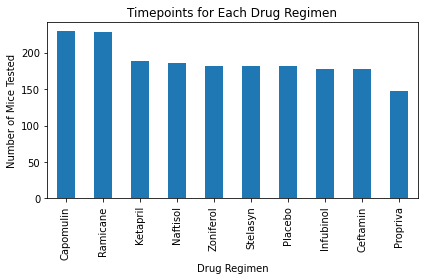

In [9]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
regimen_timepoints = regimen_group.count()["Timepoint"]
regimen_timepoints_bar = regimen_timepoints.sort_values(ascending=False).plot(kind="bar", title="Timepoints for Each Drug Regimen")
regimen_timepoints_bar.set_xlabel("Drug Regimen")
regimen_timepoints_bar.set_ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

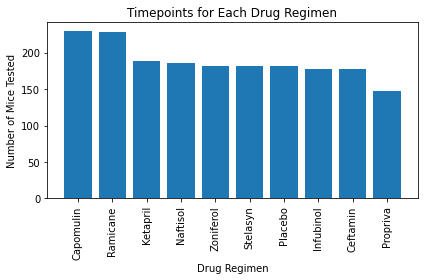

In [10]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
regimen_timepoints_sorted = regimen_timepoints.sort_values(ascending=False)
plt.bar(regimen_timepoints_sorted.index, regimen_timepoints_sorted.values, align="center")
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

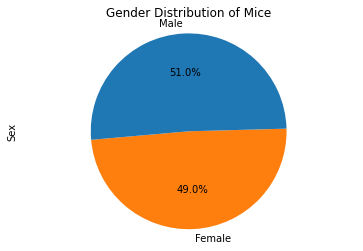

In [11]:
# Pie plot showing the distribution of female versus male mice using Pandas
gender_group = mouse_study_fixed.groupby("Sex")
gender_group_count = gender_group["Sex"].count()
gender_group_count.plot(kind="pie", y="Sex", \
                       title="Gender Distribution of Mice", startangle=185, \
                       autopct="%1.1f%%", colors=["#ff7f0e", "#1f77b4"], legend=False)
plt.axis("equal")
plt.show()

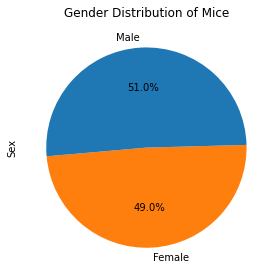

In [12]:
# Pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group_count, labels=("Female", "Male"), colors=["#ff7f0e", "#1f77b4"], startangle=185, autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the greatest timepoint for each mouse
last_timepoint = mouse_study_fixed.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint).reset_index()

# Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
mouse_last_merged = pd.merge(mouse_study_fixed, last_timepoint_df, on=("Mouse ID", "Timepoint"))
mouse_last_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for looping (and later for plotting)
four_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list for tumor volume data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatments_df = mouse_last_merged.loc[mouse_last_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_list.append(treatments_df)
   
    quartiles = treatments_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatments_df.loc[(treatments_df < lower_bound) | (treatments_df > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


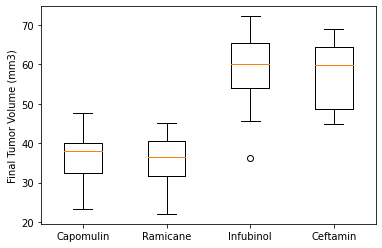

In [15]:
# Box plotthat shows the distrubution of the tumor volume for each treatment group
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_list)
plt.xticks([1,2,3,4],four_drug_list)
plt.show()

## Line and Scatter Plots

[]

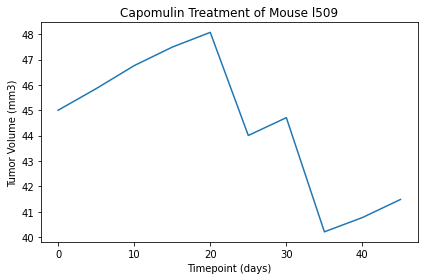

In [16]:
# Line plot of tumor volume versus time point for a mouse treated with Capomulin
capo_mouse = mouse_study_fixed.loc[mouse_study_fixed["Mouse ID"] =="l509"]
y_axis= capo_mouse["Tumor Volume (mm3)"]
x_axis= capo_mouse["Timepoint"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.plot()

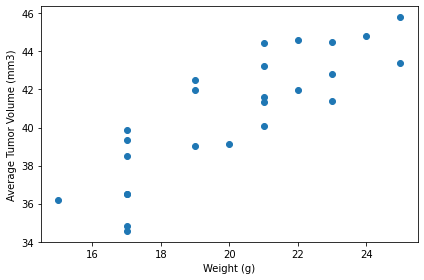

In [17]:
# Scatter plot of average tumor volume versus mouse weight for the Capomulin regimen
capo_full = mouse_study_fixed.loc[mouse_study_fixed["Drug Regimen"]=="Capomulin"]
#capo_full
capo_avg = capo_full.groupby(["Mouse ID"]).mean()
plt.scatter(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.84


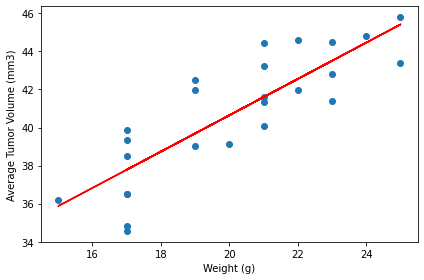

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capo_avg["Weight (g)"]
tumors = capo_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumors)
print(f"The correlation between mouse weight and the average tumor is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumors)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()